# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [3]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [4]:
websites = pd.read_csv('../website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [5]:
# What the dataset looks like?
websites.head().T

,0,1,2,3,4
URL,M0_109,B0_2314,B0_911,B0_113,B0_403
URL_LENGTH,16,16,16,17,17
NUMBER_SPECIAL_CHARACTERS,7,6,6,6,6
CHARSET,iso-8859-1,UTF-8,us-ascii,ISO-8859-1,UTF-8
SERVER,nginx,Apache/2.4.10,Microsoft-HTTPAPI/2.0,nginx,None
CONTENT_LENGTH,263,15087,324,162,124140
WHOIS_COUNTRY,None,None,None,US,US
WHOIS_STATEPRO,None,None,None,AK,TX
WHOIS_REGDATE,10/10/2015 18:21,None,None,7/10/1997 4:00,12/05/1996 0:00
WHOIS_UPDATED_DATE,None,None,None,12/09/2013 0:45,11/04/2017 0:00


In [6]:
# What are the data types?
websites.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [7]:
# Which columns contain the features of the websites?
URL 
URL_LENGTH 
NUMBER_SPECIAL_CHARACTERS 
CHARSET 
SERVER 
CONTENT_LENGTH 
WHOIS_COUNTRY 
WHOIS_STATEPRO 
WHOIS_REGDATE 
WHOIS_UPDATED_DATE

NameError: name 'URL' is not defined

In [8]:
# Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
# I suppose it is the 'Type' column since it is the column that has 1 or 0 (hinting regression will be useful)


In [9]:
# Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?
# A purely categorical variable is one that simply allows you to assign categories but you cannot clearly order the variables.  
# If the variable has a clear ordering, then that variable would be an ordinal variable, as described below.

# These should be converted to int64 type variables (by assigning number to each unique value)
URL                           object
CHARSET                       object
SERVER                        object
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object

# These should be converted to date type variables  
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object


SyntaxError: invalid syntax (<ipython-input-9-f6da654cd8f2>, line 6)

#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

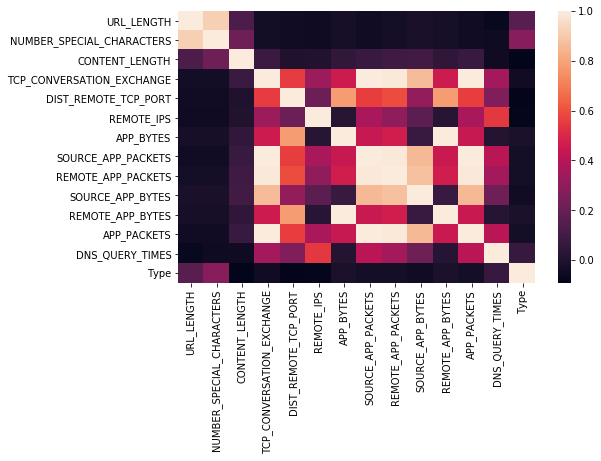

In [10]:
# Your code here
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.heatmap(websites.corr())
plt.show()


In [11]:
websites.columns

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

In [12]:
# Columns with high correlation:
REMOTE_APP_PACKETS
APP_PACKETS
SOURCE_APP_PACKETS


NameError: name 'REMOTE_APP_PACKETS' is not defined

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [13]:
# Your code here
websites_1 = websites.drop(columns=['REMOTE_APP_PACKETS','APP_PACKETS','SOURCE_APP_PACKETS'])

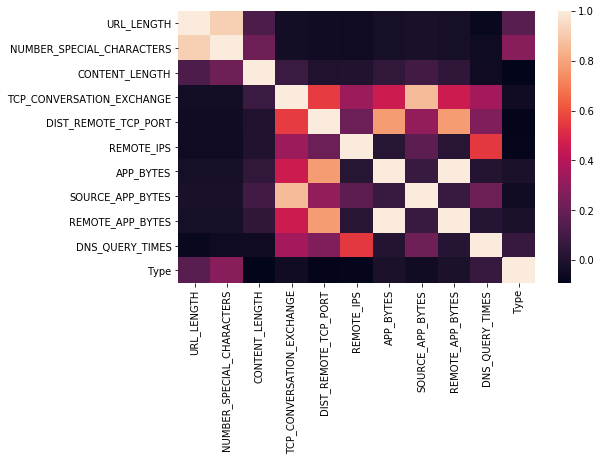

In [14]:
# Print heatmap 
plt.figure(figsize=(8,5))
sns.heatmap(websites_1.corr())
plt.show()

In [15]:
websites.columns

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [16]:
# Your code here
websites_1.isna().sum()


URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [17]:
# Your code here
websites_1.drop(columns=['CONTENT_LENGTH'],inplace=True)


In [18]:
# Your comment here
websites_1.dropna(how='any',axis=0,inplace=True)


#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [19]:
# Examine missing values in each column
websites_1.isna().sum()


URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [20]:
# Your code here
websites_1['WHOIS_COUNTRY'].unique()


array(['None', 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'se', 'IN',
       'LU', 'TH', "[u'GB'; u'UK']", 'FR', 'NL', 'UG', 'JP', 'CN', 'SE',
       'SI', 'IL', 'ru', 'KY', 'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV',
       'DE', 'ES', 'BR', 'us', 'KR', 'HK', 'UA', 'CH', 'United Kingdom',
       'BS', 'PK', 'IT', 'Cyprus', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

In [21]:
websites_1['WHOIS_COUNTRY'].replace({'Cyprus':'CY','us':'US','se':'SE',"[u'GB'; u'UK']":'GB','UK':'GB','United Kingdom':'GB'},inplace=True)
websites_1['WHOIS_COUNTRY'].unique()


array(['None', 'US', 'SC', 'GB', 'RU', 'AU', 'CA', 'PA', 'SE', 'IN', 'LU',
       'TH', 'FR', 'NL', 'UG', 'JP', 'CN', 'SI', 'IL', 'ru', 'KY', 'AT',
       'CZ', 'PH', 'BE', 'NO', 'TR', 'LV', 'DE', 'ES', 'BR', 'KR', 'HK',
       'UA', 'CH', 'BS', 'PK', 'IT', 'CY', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

In [22]:
# Your code here
websites_1['WHOIS_COUNTRY'].value_counts().head(10)

US      1105
None     306
CA        83
ES        63
GB        35
AU        35
PA        21
JP        11
CN        10
IN        10
Name: WHOIS_COUNTRY, dtype: int64

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [23]:
# Your code here
majority_countries = websites_1['WHOIS_COUNTRY'].value_counts()[:11].index.tolist() 
other_countries= websites_1['WHOIS_COUNTRY'].value_counts()[11:].index.tolist()

for country in other_countries:
    websites_1['WHOIS_COUNTRY'].replace({country :'OTHER'},inplace=True)


Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [24]:
# Your code here
websites_1.drop(columns=['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'],inplace=True)


# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [25]:
# Your code here
websites_1.dtypes


URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
WHOIS_COUNTRY                 object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [26]:
# Your code here
websites_1.drop(columns=['URL'],inplace=True)


#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [27]:
# Your code here
websites_1['CHARSET'].value_counts()


UTF-8           674
ISO-8859-1      427
utf-8           379
us-ascii        155
iso-8859-1      134
None              7
ISO-8859          1
windows-1251      1
windows-1252      1
Name: CHARSET, dtype: int64

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [28]:
# Your code here
websites_1['SERVER'].unique()

array(['nginx', 'Apache/2.4.10', 'Microsoft-HTTPAPI/2.0', 'None',
       'Apache/2', 'nginx/1.10.1', 'Apache', 'Apache/2.2.15 (Red Hat)',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'openresty/1.11.2.1', 'Apache/2.2.22', 'Apache/2.4.7 (Ubuntu)',
       'nginx/1.12.0',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Oracle-iPlanet-Web-Server/7.0', 'cloudflare-nginx', 'nginx/1.6.2',
       'openresty', 'Heptu web server', 'Pepyaka/1.11.3', 'nginx/1.8.0',
       'nginx/1.10.1 + Phusion Passenger 5.0.30',
       'Apache/2.2.29 (Amazon)', 'Microsoft-IIS/7.5', 'LiteSpeed',
       'Apache/2.4.25 (cPanel) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'tsa_c', 'Apache/2.2.0 (Fedora)', 'Apache/2.2.22 (Debian)',
       'Apache/2.2.15 (CentOS)', 'Apache/2.4.25',
       'Apache/2.4.25 (Amazon) PHP/7.0.14', 'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips'

![Think Hard](../think-hard.jpg)

In [29]:
# Your comment here
# My solution is grouping based on number to one decimal place (ie.: 2.4.1 and 2.4.9 would go on same group)

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [30]:
# Your code here
top_ten = ['Microsoft', 'Apache', 'nginx']
filtered = []
for x in websites_1['SERVER']:
   c = 0
   for y in top_ten:
       if not x.startswith(y):
           c += 1
       else:
           filtered.append(y)
       if c == 3:
           filtered.append('OTHER')


websites_1['SERVER'] = filtered

In [31]:
# Count `SERVER` value counts here
websites_1.SERVER.value_counts()


Apache       641
OTHER        599
nginx        341
Microsoft    198
Name: SERVER, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummie values to a new variable `website_dummy`.**

In [32]:
# Your code here
website_dummy = pd.get_dummies(websites_1,columns=['CHARSET','SERVER','WHOIS_COUNTRY'],drop_first=True)


Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [33]:
# Your code here
website_dummy.head()


,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,REMOTE_APP_BYTES,DNS_QUERY_TIMES,Type,...,WHOIS_COUNTRY_CN,WHOIS_COUNTRY_CZ,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_GB,WHOIS_COUNTRY_IN,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_None,WHOIS_COUNTRY_OTHER,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_US
0,16,7,7,0,2,700,1153,832,2.0,1,...,0,0,0,0,0,0,1,0,0,0
1,16,6,17,7,4,1230,1265,1230,0.0,0,...,0,0,0,0,0,0,1,0,0,0
2,16,6,0,0,0,0,0,0,0.0,0,...,0,0,0,0,0,0,1,0,0,0
3,17,6,31,22,3,3812,18784,4380,8.0,0,...,0,0,0,0,0,0,0,0,0,1
4,17,6,57,2,5,4278,129889,4586,4.0,0,...,0,0,0,0,0,0,0,0,0,1


In [34]:
columns = website_dummy.columns.tolist() 
columns_2 = []
for i in columns:
    if i != 'Type':
        columns_2.append(i)


# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [35]:
from sklearn.model_selection import train_test_split

# Your code here:

X = website_dummy[columns_2]
y = website_dummy['Type']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)



In [36]:
website_dummy.dtypes


URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
DNS_QUERY_TIMES              float64
Type                           int64
CHARSET_ISO-8859-1             uint8
CHARSET_None                   uint8
CHARSET_UTF-8                  uint8
CHARSET_iso-8859-1             uint8
CHARSET_us-ascii               uint8
CHARSET_utf-8                  uint8
CHARSET_windows-1251           uint8
CHARSET_windows-1252           uint8
SERVER_Microsoft               uint8
SERVER_OTHER                   uint8
SERVER_nginx                   uint8
WHOIS_COUNTRY_CA               uint8
WHOIS_COUNTRY_CN               uint8
WHOIS_COUNTRY_CZ               uint8
WHOIS_COUNTRY_ES               uint8
WHOIS_COUNTRY_GB               uint8
WHOIS_COUNTRY_IN               uint8
W

#### For this lab, we will opt to use SVM. 

Support Vector Machines, or SVM, is an algorithm that aims to draw a line or a plane between the two groups such that they are linearly separable and the distance from the observations of each group to the line or plane is maximized. The goal of the algorithm is to find the line or plane that separates the groups. You can read more about this algorithm [here](https://en.wikipedia.org/wiki/Support_vector_machine).

In the next cell, `svm` will be imported for you. **You will initialize the proper estimator, fit the training data, and predict the test data.**

The `sklearn.svm` class documentation can be found [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm). By reading the documentation and searching online, the question you'll need to answer is **which SVM estimator to use**? When you choose the estimator, keep the following in mind:

* Our data are categorical, not continuous.

* We have removed the correlated columns. All columns we have right now are independent.

If your statistical knowledge is not adequate at this moment, don't worry. Just play around and make an informed guess. We'll evaluate your prediction in the next step. If the prediction is unsatisfactory you can move back to this step to modify your estimator.

In the following cell, we'll show you how to compute the accuracy of your prediction. The output score will show you how often your classifier is correct. If you have used the proper estimator, your accuracy score should be over 0.9. However, if your accuracy score is unsatisfactory, go back to the previous step to try another estimator until you produce a satisfactory accuracy score.

In [37]:
from sklearn import svm
from sklearn import metrics

# Your code here:
clf = svm.LinearSVC()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

# Computer prediction accuracy
metrics.accuracy_score(y_test, y_pred)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9185393258426966

In [38]:
# Your code here:
clf = svm.OneClassSVM()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

# Computer prediction accuracy
metrics.accuracy_score(y_test, y_pred)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.011235955056179775

In [39]:
#clf = svm.LinearSVR() & NuSVR() & SVR()
#ValueError: Classification metrics can't handle a mix of binary and continuous targets


In [40]:
# clf = svm.NuSVC()
# ValueError: specified nu is infeasible


In [41]:
# clf = svm.l1_min_c()
# TypeError: l1_min_c() missing 2 required positional arguments: 'X' and 'y'


In [42]:
# Your code here:
clf = svm.OneClassSVM()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

# Computer prediction accuracy
metrics.accuracy_score(y_test, y_pred)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.011235955056179775

In [48]:
from sklearn import svm
from sklearn import metrics

# Your code here:
clf = svm.SVC(probability=True)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

# Computer prediction accuracy
metrics.accuracy_score(y_test, y_pred)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9269662921348315

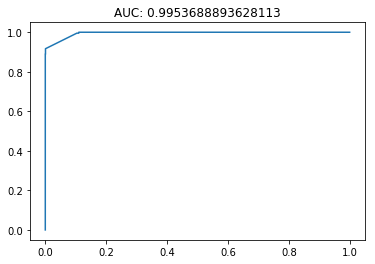

In [49]:
# ROC Curve
import matplotlib.pyplot as plt


def plotMetrics(X, y, clf):
  y_pred_proba = clf.predict_proba(X)[::,1]
  fpr, tpr, _ = metrics.roc_curve(y,  y_pred_proba)
  auc = metrics.roc_auc_score(y, y_pred_proba)
  plt.title("AUC: {}".format(auc))
  plt.plot(fpr,tpr)
plotMetrics(X,y,clf)

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use SVM to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [39]:
# Your code here